In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
cd ../

/home/mbanga/Documents/Epfl/ml_revisions


# Load data

In [3]:
from linearRegression_gradientDescent import costs as cts
from linearRegression_gradientDescent import grid_search, plots
from linearRegression_gradientDescent import gradient_descent as gd

import datetime
from leastSquares import helpers

In [13]:
height, weight, gender = helpers.load_data_hwg(sub_sample=False, add_outlier=False)
x, mean_x, std_x = helpers.standardize(height)
y, mean_y, std_y = helpers.standardize(weight)
y, tx = helpers.build_model_data(x, y)

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [22]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    N, D = tx.shape    
    # svd decomposition of data matrix
    u, s, vh = np.linalg.svd(tx, full_matrices=True)
    # reshape s to its true shape (NxD)
    new_s = np.zeros((N, D))
    np.fill_diagonal(new_s, s)
    s = new_s
    # get pseudo-inverse
    s_ = np.linalg.pinv(s)
    # apply analytical solution
    w  = vh.T @ s_ @ u.T @ y
    # compute loss
    loss = cts.compute_mse(y, tx, w)
    
    return loss, w

## Compare Methods 

In [6]:
# ***************************************************
# Grid Search
# ***************************************************

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = grid_search.generate_w(num_intervals=200)
    
# Start the grid search
grid_start_time = datetime.datetime.now()
grid_losses = grid_search.grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
grid_loss_star, grid_w0_star, grid_w1_star = grid_search.get_best_parameters(grid_w0, grid_w1, grid_losses)
grid_end_time = datetime.datetime.now()
grid_execution_time = (grid_end_time - grid_start_time).total_seconds()
    
# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
          l=grid_loss_star, w0=grid_w0_star, w1=grid_w1_star, t=grid_execution_time), "\n\n")

Grid Search: loss*=0.21329068666405843, w0*=-0.5025125628140614, w1*=0.7537688442211277, execution time=32.127 seconds 




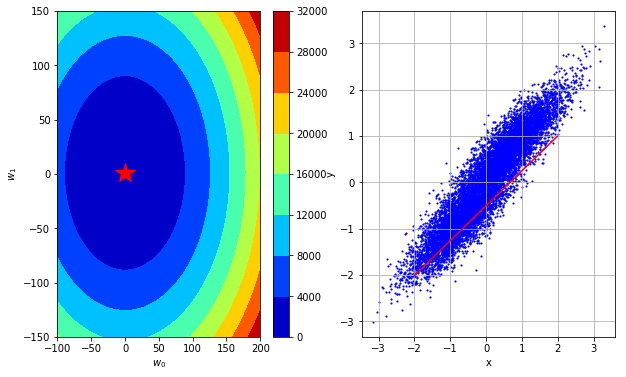

In [7]:
# Plot the results
fig = plots.grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, x, y)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

In [8]:
# ***************************************************
# Least Squares
# ***************************************************
    
# Start the least squares
ls_start_time = datetime.datetime.now()
ls_loss_star, ls_w_star = least_squares(y, tx)
    
# Determine execution time
ls_end_time = datetime.datetime.now()
ls_execution_time = (ls_end_time - ls_start_time).total_seconds()
    
# Print the results
print("Least Squares: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
          l=ls_loss_star, w0=ls_w_star[0], w1=ls_w_star[1], t=ls_execution_time), "\n\n")

Least Squares: loss*=0.07241289396950197, w0*=-4.440892098500626e-16, w1*=0.9247562987409148, execution time=0.913 seconds 




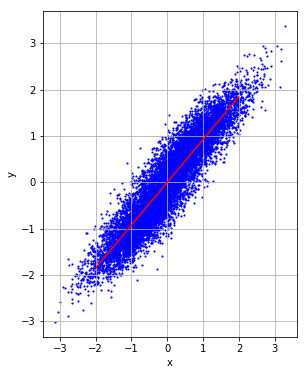

In [9]:
fig = plt.figure()

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(x, y, marker=".", color='b', s=5)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid()

pred_x, pred_fx = plots.prediction(ls_w_star[0], ls_w_star[1],
                                mean_x, std_x)
ax2.plot(pred_x, pred_fx, 'r')


fig.set_size_inches(10.0,6.0)

In [10]:
# ***************************************************
# Gradient Descent
# ***************************************************

# Initial parameters
max_iters = 200
gamma = 0.05

initial_w = np.array([150, 100])

# Start the least squares
gd_start_time = datetime.datetime.now()
gd_losses, gd_ws = gd.gradient_descent(y, tx, initial_w, max_iters, gamma)

# Determine execution time
gd_end_time = datetime.datetime.now()
gd_execution_time = (gd_end_time - gd_start_time).total_seconds()

gd_loss_star = gd_losses[-1]
gd_w_star = gd_ws[-1]
    
# Print the results
print("Gradient Descent: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
          l=gd_loss_star, w0=gd_w_star[0], w1=gd_w_star[1], t=gd_execution_time), "\n\n")

Gradient Descent: loss*=0.07243274707397811, w0*=0.00525789993732525, w1*=0.9282291501918963, execution time=0.178 seconds 




In [14]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = plots.gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, x, y, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=201, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [12]:
from leastSquares.helpers import load_data 
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [21]:
def build_poly(x, degree):
    """txnomial basis functions for input data x, for j=0 up to j=degree."""
    # this function should return the matrix formed
    # by applying the txnomial basis to the input data
    N = len(x)
    tx = np.zeros((N, degree+1))
    for j in range(degree+1):
        tx[:, j] = np.power(x, j)
    
    return tx

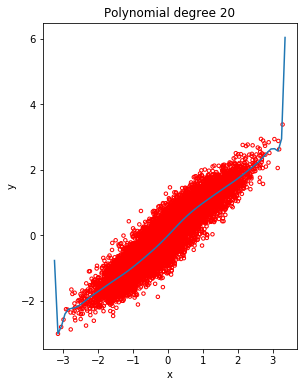

In [31]:
from leastSquares.plots import plot_fitted_curve
# we use least square with feature augmentation (polynomial basis)

# degree of polynomial
degree = 20
# build polynomial
tx = build_poly(x, degree)
# find optimal weights with least squares
loss, w = least_squares(y, tx)
# plot
fig = plt.figure()
fig.set_size_inches(10.0, 6.0)

ax = fig.add_subplot(1, 2, 1)
plot_fitted_curve(y, x, w, degree, ax)


In [32]:
def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # form the data to do polynomial regression
        tx = build_poly(x, degree)

        # least square and calculate RMSE
        mse, weights = least_squares(y, tx)
        rmse = cts.compute_rmse(y, tx, weights)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Processing 1th experiment, degree=1, rmse=0.38055983489985373
Processing 2th experiment, degree=3, rmse=0.3772328090075089
Processing 3th experiment, degree=7, rmse=0.3756054369985518
Processing 4th experiment, degree=12, rmse=0.3754830950382974


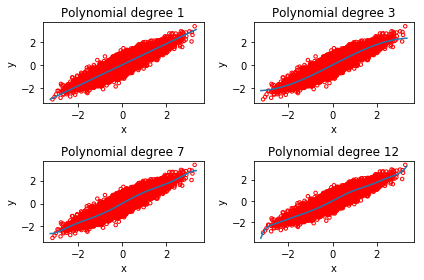

In [33]:
polynomial_regression()